In [1]:
import mlx.core as mx
from modeling_llava_qwen2 import SigLipImageProcessor
# thanks to mlx-vlm repo for this logic
from utils import load, generate

# nanollava1.5 already converted using utils.convert

/Users/charleszhang/miniforge3/envs/mlx-vlm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
img_path = "traffic.jpg"
model_path = "./mlx_nanoLLaVA-1.5"
model, tokenizer = load(model_path)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [3]:
# text prompt
prompt = 'Describe this image in detail'

messages = [
    {"role": "user", "content": f'<image>\n{prompt}'}
]
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True
)

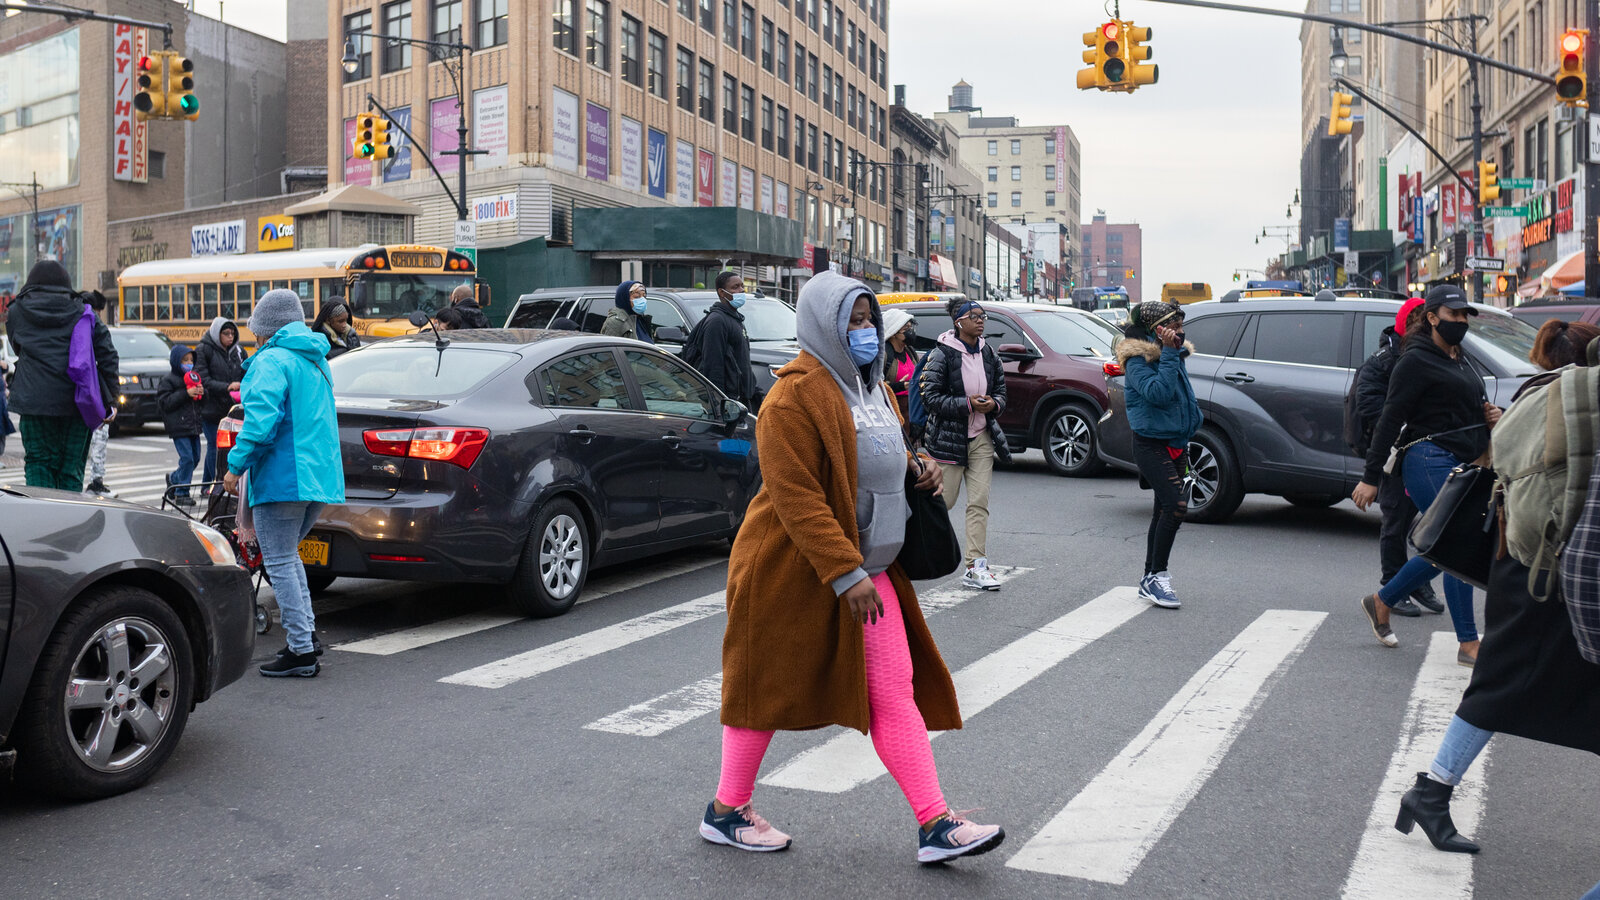

Image: traffic.jpg 

Prompt: <|im_start|>system
Answer the questions.<|im_end|><|im_start|>user
<image>
Describe this image in detail<|im_end|><|im_start|>assistant

The image captures a moment on a bustling city street, where a group of people are crossing the street. The focus is on a woman in the foreground, who is crossing the street with a pink and black striped backpack. She is dressed in a long coat and is wearing a pink headband, adding a pop of color to her outfit. The woman is walking towards the camera, her gaze directed towards the left side of the image.

The background of the image reveals a busy street with cars and buildings,
Prompt: 9.767 tokens-per-sec
Generation: 19.481 tokens-per-sec


In [8]:
image_processor = SigLipImageProcessor("mlx")
import PIL
display(PIL.Image.open(img_path))
output = generate(model, tokenizer, img_path, text, image_processor=image_processor, verbose=True)
# print(output)